In [1]:
import pandas as pd
import pickle

with open('../yk_dataframes.pkl', 'rb') as file:
    yk_data = pickle.load(file)
yk_full = yk_data['yk_full']
yk_dropped = yk_data['yk_dropped']

with open('../ty_dataframes.pkl', 'rb') as file:
    ty_data = pickle.load(file)
ty_full = ty_data['ty_full']
ty_dropped = ty_data['ty_dropped']


with open('../luna_dataframes.pkl', 'rb') as file:
    luna_data = pickle.load(file)
luna_full = luna_data['luna_full']
luna_dropped = luna_data['luna_dropped']

In [6]:
df_full = pd.concat([yk_full, ty_full, luna_full], axis=0)
df_full = df_full.fillna(0)

In [7]:
df_full

,Name,Target,Target_Encoded,Distribution Type,Count,Unique_Count,Mean,Median,Std_Dev,IQR,...,Outliers_Zscore_prop,Outliers_IQR,Outliers_IQR_prop,Outliers_Tukey,Outliers_Tukey_prop,QQ Count,KS_Stat_norm,KS_P_value_norm,Shapiro_Stat,Shapiro_P_value
0,temperature,Other,0,functional,69577,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,1.000000,0.0,0.000000,0.000000e+00
1,Device_Test_Time,Outlier/Longtail,1,longtail,69577,1837,0.569689,0.581448,0.046597,0.020663,...,0.017204,69577,1.000000,2141,0.030772,1790,0.310838,0.0,0.398593,7.040191e-157
2,Part_Id,Outlier/Longtail,1,longtail,69577,19465,0.364150,0.331227,0.255077,0.407470,...,0.000000,0,0.000000,0,0.000000,1478,0.076701,0.0,0.955334,3.218504e-84
3,g2bist_efuse_blank_read_f_:Functional[1],Other,0,functional,924,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,1.000000,0.0,0.000000,0.000000e+00
4,tdf_50k_2_f_:Functional[1],Other,0,functional,4,2,0.250000,0.000000,0.500000,0.250000,...,0.000000,1,0.250000,0,0.000000,0,1.000000,0.0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3365,f_nvmXWritePatvformRdtyperdNvm1_x_x_vhsform__r...,Outlier/Longtail,1,longtail,10743,11,0.000771,0.000000,0.018579,0.000000,...,0.004840,52,0.004840,52,0.004840,104,0.511717,0.0,0.018259,7.440625e-117
3366,f_nvmXWritePatvformRdtyperdNvm1_x_x_vhsform__r...,Other,0,functional,10743,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,1.000000,0.0,0.000000,0.000000e+00
3367,f_nvmXWritePatvformRdtyperdRedenNvm1_x_x_vhsfo...,Other,0,functional,10743,1,0.000000,0.000000,0.000000,0.000000,...,0.000000,0,0.000000,0,0.000000,0,1.000000,0.0,0.000000,0.000000e+00
3368,f_nvmXWritePatvformRdtyperdRedenNvm1_x_x_vhsfo...,Other,0,discrete,10743,3,0.000186,0.000000,0.011815,0.000000,...,0.000279,3,0.000279,3,0.000279,6,0.506007,0.0,0.003628,2.985696e-117


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_full['Multiclass_Target'] = label_encoder.fit_transform(df_full['Distribution Type'])

In [9]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)    

{'bimodal': 0, 'discrete': 1, 'functional': 2, 'longtail': 3, 'normal': 4, 'outlier': 5}


In [10]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded', 'Multiclass_Target']
X = df_full.drop(columns = columns_to_drop)
y = df_full['Multiclass_Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9405172413793104
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.88      0.94      0.91        71
           2       0.99      1.00      0.99       662
           3       0.81      0.83      0.82       127
           4       0.87      0.78      0.82        69
           5       0.93      0.90      0.91       201

    accuracy                           0.94      1160
   macro avg       0.89      0.89      0.89      1160
weighted avg       0.94      0.94      0.94      1160



In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [17]:
model_smote = RandomForestClassifier() #class_weight={3: 2, 5: 2}
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.9422413793103448
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        30
           1       0.91      0.96      0.93        71
           2       0.99      1.00      0.99       662
           3       0.82      0.83      0.82       127
           4       0.81      0.83      0.82        69
           5       0.94      0.88      0.91       201

    accuracy                           0.94      1160
   macro avg       0.89      0.90      0.90      1160
weighted avg       0.94      0.94      0.94      1160



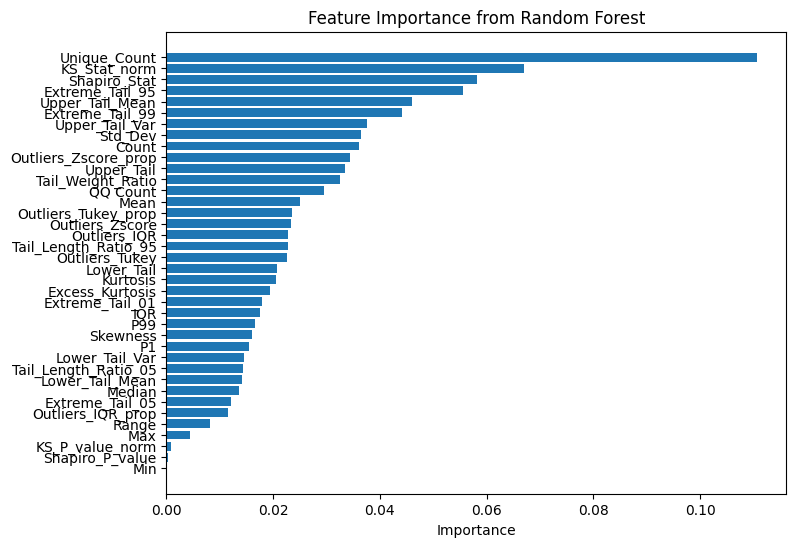

In [16]:
import pandas as pd
import matplotlib as plt

importances = model_smote.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train_smote.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [18]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

/Users/snowy/miniconda3/envs/tf/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 0.9456896551724138
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       0.92      0.92      0.92        71
           2       0.99      1.00      0.99       662
           3       0.84      0.85      0.84       127
           4       0.86      0.80      0.83        69
           5       0.93      0.90      0.92       201

    accuracy                           0.95      1160
   macro avg       0.89      0.90      0.90      1160
weighted avg       0.95      0.95      0.95      1160



In [20]:
weights = {0: 1, 1: 1, 2: 1, 3: 5, 4: 1, 5: 5} 
scale_pos_weight = {class_label: weight for class_label, weight in weights.items()}

model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train_smote, y_train_smote)
xgb_pred = xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.9456896551724138
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89        30
           1       0.92      0.92      0.92        71
           2       0.99      1.00      0.99       662
           3       0.84      0.85      0.84       127
           4       0.86      0.80      0.83        69
           5       0.93      0.90      0.92       201

    accuracy                           0.95      1160
   macro avg       0.89      0.90      0.90      1160
weighted avg       0.95      0.95      0.95      1160



In [54]:
import numpy as np 

y_probs = xgb_model.predict_proba(X_test)

custom_threshold = 0.01

y_pred_custom = np.zeros_like(y_probs)

y_pred_custom[:, 3] = (y_probs[:, 3] >= custom_threshold).astype(int)
y_pred_custom[:, 5] = (y_probs[:, 5] >= custom_threshold).astype(int)

y_pred_final = ((y_pred_custom[:, 3] == 1) | (y_pred_custom[:, 5] == 1)).astype(int)
y_test_final = ((y_test == 3) | (y_test == 5)).astype(int)

# top_2_classes = np.argsort(y_probs, axis=1)[:, -2:]
# top_2_probs = np.sort(y_probs, axis=1)[:, -2:]

In [55]:
print("Accuracy:", accuracy_score(y_test_final, y_pred_final))
print("Classification Report:\n", classification_report(y_test_final, y_pred_final))

Accuracy: 0.7172413793103448
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.61      0.76       832
           1       0.50      0.99      0.66       328

    accuracy                           0.72      1160
   macro avg       0.75      0.80      0.71      1160
weighted avg       0.85      0.72      0.73      1160



# Grouping longtail and outlier together

In [28]:
binary_pred_xgb = pd.Series(xgb_pred).apply(lambda x: 1 if x in [3, 5] else 0)
binary_pred_rf = pd.Series(y_pred_smote).apply(lambda x: 1 if x in [3, 5] else 0)

binary_test = pd.Series(y_test).apply(lambda x: 1 if x in [3, 5] else 0)

In [30]:
print("Accuracy:", accuracy_score(binary_test, binary_pred_xgb))
print("Classification Report:\n", classification_report(binary_test, binary_pred_xgb))

Accuracy: 0.9732758620689655
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       832
           1       0.96      0.95      0.95       328

    accuracy                           0.97      1160
   macro avg       0.97      0.96      0.97      1160
weighted avg       0.97      0.97      0.97      1160

